In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 100)

In [4]:
data = pd.read_csv("src/data.csv", sep=",")

In [5]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122,1,19,12,...,0,0,0,0,0,0,10٫8,1٫4,1٫74,Dropout
1,1,15,1,9254,1,1,160,1,1,3,...,0,6,6,6,13٫6666666666667,0,13٫9,-0٫3,0٫79,Graduate
2,1,1,5,9070,1,1,122,1,37,37,...,0,6,0,0,0,0,10٫8,1٫4,1٫74,Dropout
3,1,17,2,9773,1,1,122,1,38,37,...,0,6,10,5,12٫4,0,9٫4,-0٫8,-3٫12,Graduate
4,2,39,1,8014,0,1,100,1,37,38,...,0,6,6,6,13,0,13٫9,-0٫3,0٫79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125,1,1,1,...,0,6,8,5,12٫6666666666667,0,15٫5,2٫8,-4٫06,Graduate
4420,1,1,2,9773,1,1,120,105,1,1,...,0,6,6,2,11,0,11٫1,0٫6,2٫02,Dropout
4421,1,1,1,9500,1,1,154,1,37,37,...,0,8,9,1,13٫5,0,13٫9,-0٫3,0٫79,Dropout
4422,1,1,1,9147,1,1,180,1,37,37,...,0,5,6,5,12,0,9٫4,-0٫8,-3٫12,Graduate


In [6]:
for i in range(len(data)):
    data.loc[i, "Previous qualification (grade)"] = data.loc[i, "Previous qualification (grade)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Curricular units 1st sem (grade)"] = str(data.loc[i, "Curricular units 1st sem (grade)"]).replace("٫", ".")
    data.loc[i, "Curricular units 2nd sem (grade)"] = data.loc[i, "Curricular units 2nd sem (grade)"].replace("٫", ".")
    # data.loc[i, "Curricular units 2nd sem (credited)"] = data.loc[i, "Curricular units 2nd sem (credited)"].replace("٫", ".")
    data.loc[i, "Admission grade"] = data.loc[i, "Admission grade"].replace("٫", ".")
    data.loc[i, "Unemployment rate"] = data.loc[i, "Unemployment rate"].replace("٫", ".")
    data.loc[i, "Inflation rate"] = data.loc[i, "Inflation rate"].replace("٫", ".")
    data.loc[i, "GDP"] = data.loc[i, "GDP"].replace("٫", ".")
    


In [7]:
data = data.drop([5, 179, 371, 528, 677, 682, 739, 884, 1527, 1548, 1550, 1609, 1695, 1995,
 2217, 2358, 2365, 2369, 2404, 2433, 2603, 2814, 2919, 2921, 3036, 3223, 3327, 3410,
 3502, 3570, 3684, 3741, 3891, 4056, 4177, 4188, 4217, 4240])

In [8]:
le = LabelEncoder()
data["Target"] = le.fit_transform(data["Target"])

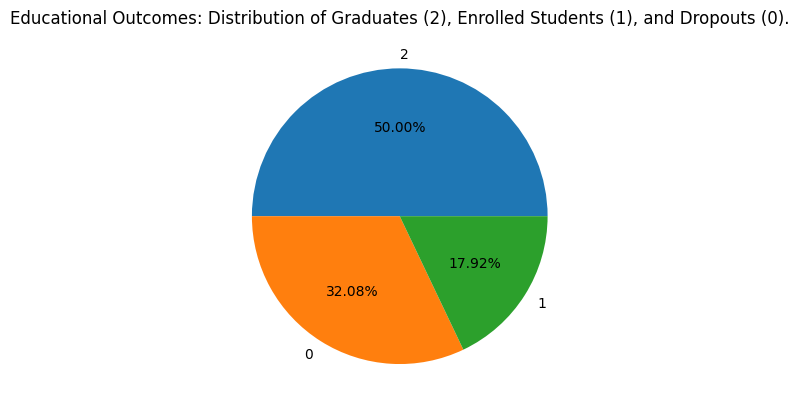

In [9]:
category_count = data["Target"].value_counts()
plt.pie(category_count.values, labels=category_count.index, autopct='%1.2f%%')
plt.title('Educational Outcomes: Distribution of Graduates (2), Enrolled Students (1), and Dropouts (0).')
plt.show()

<Axes: >

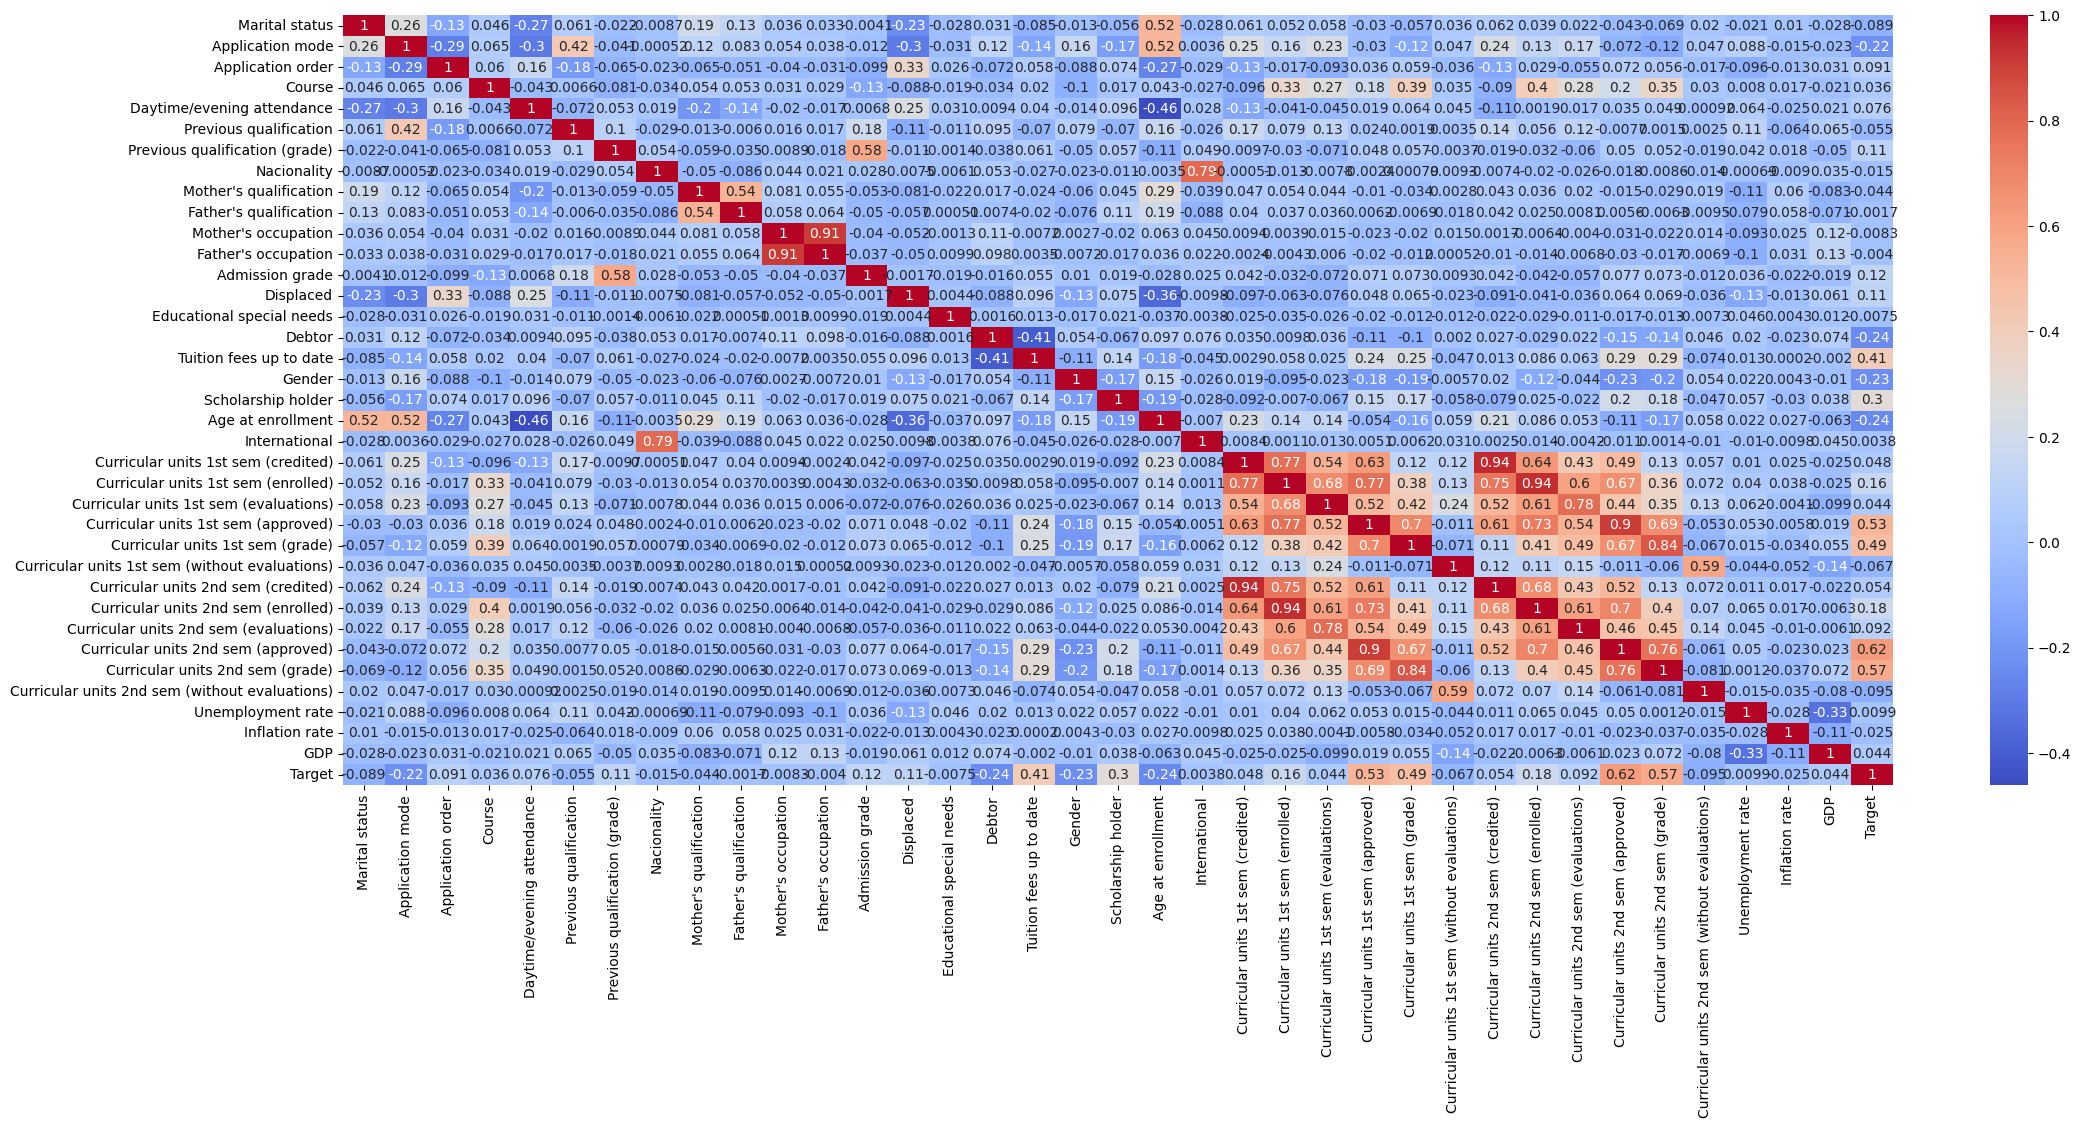

In [10]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [11]:
clean_data = data.drop(columns=['Nacionality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation', 
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'])

In [12]:
X = pd.DataFrame(clean_data.iloc[:, :-1])
y = pd.DataFrame(clean_data.iloc[:, -1])

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.fit_transform(scaled_data)

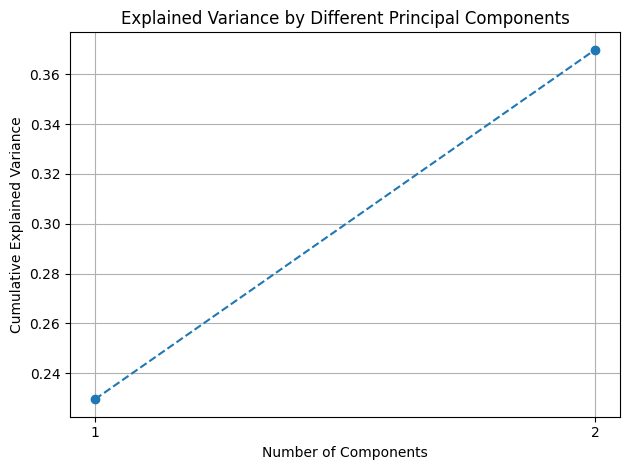

In [15]:
plt.figure()
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Drawing a horizontal line at 95% cumulative explained variance

plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))

plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# plt.figure(figsize=(12, 8))
# # plt.scatter(pca_data[:,0], pca_data[:,1], c=y)
# sns.scatterplot(pca_data)

<Axes: >

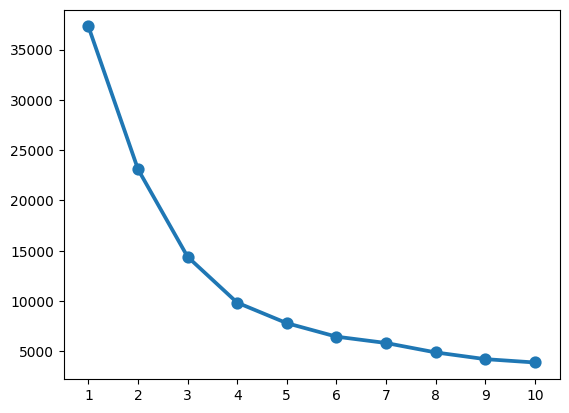

In [17]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_data)
    wcss[i] = kmeans.inertia_

sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))

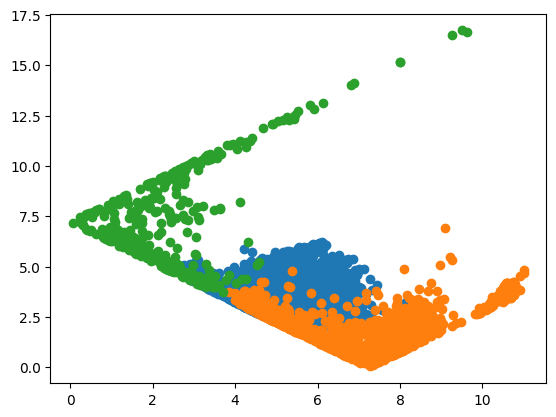

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_data)
label = kmeans.fit_predict(pca_data)
cluster_data = kmeans.fit_transform(pca_data)
u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(cluster_data[label == i , 0] , cluster_data[label == i , 1] , label = i)
plt.show()


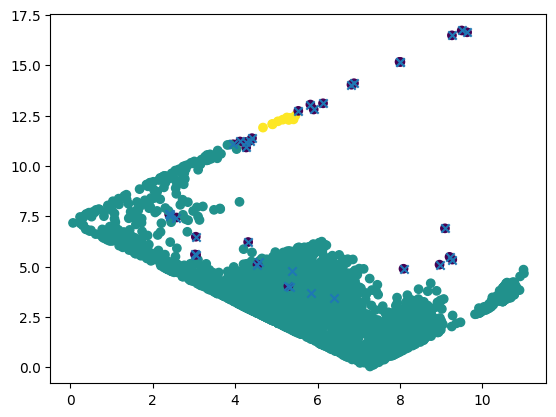

silhouette score: 0.6060066431629488
outliner: [ 102  178  242  372  515  529  678  683  685  701 1507 1561 1563 2017
 2382 2388 2392 2427 2456 2627 2659 2819 2841 2851 2951 2953 3068 3255
 3444 3537 3605 3776 3819 3928 4212 4275 4377]


In [19]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(cluster_data)
dbscan_labels = dbscan.labels_
outliers = np.where(dbscan_labels == -1)[0]
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=dbscan_labels)
plt.scatter(cluster_data[outliers, 0], cluster_data[outliers, 1], marker="x")

plt.show()
print(f"silhouette score: {silhouette_score(cluster_data, dbscan_labels)}")
print(f"outliner: {outliers}")


In [20]:
x_train, x_test, y_train, y_test = train_test_split(cluster_data, y, random_state=7, test_size=0.2)

In [21]:
y

,Target
0,0
1,2
2,0
3,2
4,2
...,...
4419,2
4420,0
4421,0
4422,2


In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg = LogisticRegression()
svc_paramenter = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5]
}
lg_regressor = GridSearchCV(lg, param_grid=svc_paramenter)
lg_regressor.fit(x_train, y_train)


print(lg_regressor.best_params_)
print(lg_regressor.best_score_)

{'C': 0.1}
0.6747434474966572


In [24]:
model = LogisticRegression(random_state=10, C=0.1)
best_score_lg = 0
kf = KFold(n_splits=5)
for train, test in kf.split(X, y):
    model.fit(X.iloc[train], y.iloc[train])
    print(f"train: {model.score(X.iloc[train], y.iloc[train])}")
    print(f"test: {model.score(X.iloc[test], y.iloc[test])}")
    


train: 0.7448688711516533
test: 0.7574031890660592
train: 0.7457965232259903
test: 0.7434435575826682
train: 0.749786263892847
test: 0.7468643101482326
train: 0.7486463379880308
test: 0.7400228050171037
train: 0.755770874893132
test: 0.7309007981755986


In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC()
svc_paramenter = {
    'C': [1, 10, 20, 30, 100],
    'gamma': [1, 2, 3, 5, 8, 10]
}
svc_regressor = GridSearchCV(svc, param_grid=svc_paramenter)
svc_regressor.fit(x_train,y_train)


print(svc_regressor.best_params_)
print(svc_regressor.best_score_)

{'C': 1, 'gamma': 1}
0.6958362290744602


In [28]:

clf = SVC(C=1, gamma=1)



kf = KFold(n_splits=5)
for train, test in kf.split(X, y):
     clf.fit(X.iloc[train], y.iloc[train])
     print(clf.score(X.iloc[train], y.iloc[train]))
     print(clf.score(X.iloc[test], y.iloc[test]))


0.999714937286203
0.541002277904328
0.999715018523796
0.5131128848346637
1.0
0.48346636259977194
1.0
0.4868871151653364
0.999715018523796
0.47776510832383123


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest = RandomForestClassifier()
svc_paramenter = {
    'n_estimators': [1, 5, 10, 20],
    'max_depth': [1, 2, 3, 4, 5]
}
forest_regressor = GridSearchCV(forest, param_grid=svc_paramenter)
forest_regressor.fit(x_train,y_train)
print(forest_regressor.best_params_)
print(forest_regressor.best_score_)

{'max_depth': 5, 'n_estimators': 20}
0.6966921491885828


In [31]:
forest = RandomForestClassifier(n_estimators=20, max_depth=5)


kf = KFold(n_splits=5)
for train, test in kf.split(X, y):
    forest.fit(X.iloc[train], y.iloc[train])
    print(f"train: {forest.score(X.iloc[train], y.iloc[train])}")
    print(f"test: {forest.score(X.iloc[test], y.iloc[test])}")


train: 0.7708095781071835
test: 0.7539863325740319
train: 0.7637503562268453
test: 0.774230330672748
train: 0.7600455970361927
test: 0.7286202964652223
train: 0.7717298375605586
test: 0.7457240592930444
train: 0.7791393559418638
test: 0.7514253135689852


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()
svc_paramenter = {
    'n_neighbors': [1, 2, 3, 4, 5],
    
}
forest_regressor = GridSearchCV(knn, param_grid=svc_paramenter)
forest_regressor.fit(x_train,y_train)
print(forest_regressor.best_params_)
print(forest_regressor.best_score_)

{'n_neighbors': 5}
0.6388281291277013


In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5)
for train, test in kf.split(X, y):
    knn.fit(X.iloc[train], y.iloc[train])
    print(f"train: {knn.score(X.iloc[train], y.iloc[train])}")
    print(f"test: {knn.score(X.iloc[test], y.iloc[test])}")

train: 0.7633979475484607
test: 0.6332574031890661
train: 0.7563408378455401
test: 0.6807297605473204
train: 0.7614705044172129
test: 0.6670467502850627
train: 0.7648902821316614
test: 0.6590649942987458
train: 0.7631803932744372
test: 0.6510832383124288


In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gradient = GradientBoostingClassifier()
gradient_boosting_paramenter = {
    'n_estimators': [10, 20, 30, 40, 50],
    'learning_rate': [0.1, 0.01, 0.001, 0.5]
    
}
gradient_boostring = GridSearchCV(gradient, param_grid=gradient_boosting_paramenter)
gradient_boostring.fit(x_train,y_train)
print(gradient_boostring.best_params_)
print(gradient_boostring.best_score_)

{'learning_rate': 0.1, 'n_estimators': 10}
0.690990892132119


In [40]:
gradientBoosting = GradientBoostingClassifier(learning_rate= 0.1, n_estimators=10)
kf = KFold(n_splits=5)
best_score_gradientBoosting = 0
for train, test in kf.split(X, y):
    gradientBoosting.fit(X.iloc[train], y.iloc[train])
    print(f"train: {gradientBoosting.score(X.iloc[train], y.iloc[train])}")
    print(f"test: {gradientBoosting.score(X.iloc[test], y.iloc[test])}")


train: 0.7531356898517674
test: 0.7414578587699316
train: 0.7506412083214591
test: 0.7639680729760547
train: 0.7492163009404389
test: 0.7320410490307868
train: 0.755770874893132
test: 0.7480045610034207
train: 0.7566258193217441
test: 0.7354618015963512


In [41]:
from sklearn.linear_model import Ridge

In [48]:
ridge = Ridge()
ridge_parameter = {
    'alpha': [0.1, 0.01, 0.001, 1, 2, 3, 5, 8, 10],
    
    
}
ridge_regressor = GridSearchCV(ridge, param_grid=ridge_parameter)
ridge_regressor.fit(x_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
0.4140886043710757


In [50]:
ridge = Ridge(alpha=1)
kf = KFold(n_splits=5)
best_score_gradientBoosting = 0
for train, test in kf.split(X, y):
    gradientBoosting.fit(X.iloc[train], y.iloc[train])
    print(f"train: {gradientBoosting.score(X.iloc[train], y.iloc[train])}")
    print(f"test: {gradientBoosting.score(X.iloc[test], y.iloc[test])}")

train: 0.7531356898517674
test: 0.7414578587699316
train: 0.7506412083214591
test: 0.7639680729760547
train: 0.7492163009404389
test: 0.7320410490307868
train: 0.755770874893132
test: 0.7480045610034207
train: 0.7566258193217441
test: 0.7354618015963512
